<a href="https://colab.research.google.com/github/roksanaoni/Maching-learning-Lab/blob/main/Lab_Report_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best K Value: 3, Accuracy: 0.667

Custom KNN - Accuracy: 0.667, Precision: 0.750, Recall: 0.750, F1 Score: 0.667
Sklearn KNN - Accuracy: 0.667, Precision: 0.750, Recall: 0.750, F1 Score: 0.667

Confusion Matrix:
[[1 0]
 [1 1]]


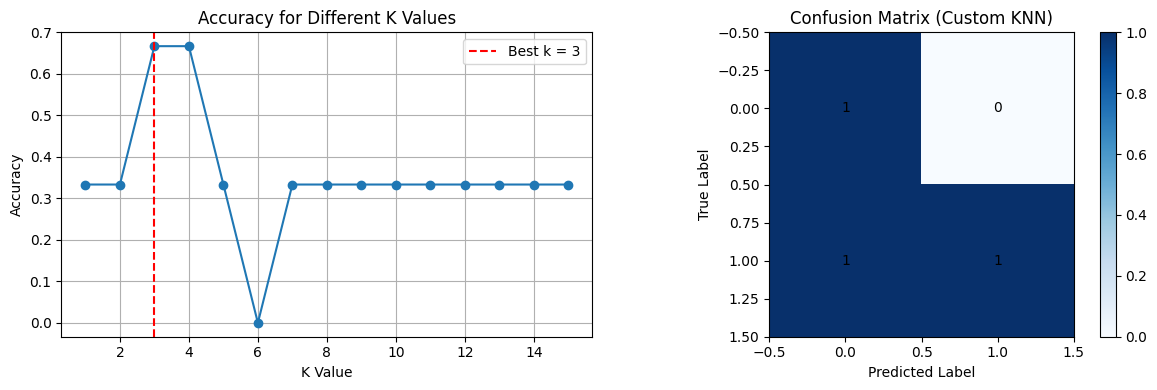

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# ----- Load and Prepare Dataset -----
news_df = pd.read_csv("news.csv")  # Make sure file is in same folder or provide full path
texts = news_df['text'].values
labels = news_df['label'].values
texts = sports + politics
labels = ['sports'] * len(sports) + ['politics'] * len(politics)

label_to_num = {'sports': 0, 'politics': 1}
y = np.array([label_to_num[label] for label in labels])

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Custom KNN Class
class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, features, labels):
        self.train_data = features
        self.train_labels = labels

    def predict(self, test_data):
        predictions = []
        for test_point in test_data:
            distances = [np.sqrt(np.sum((test_point - train_point) ** 2)) for train_point in self.train_data]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = [self.train_labels[i] for i in nearest_indices]
            most_common = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

# Evaluation Metrics
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def create_confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        matrix[t][p] += 1
    return matrix

def get_metrics(y_true, y_pred, num_classes):
    cm = create_confusion_matrix(y_true, y_pred, num_classes)
    precision = np.diag(cm) / np.sum(cm, axis=0, where=(np.sum(cm, axis=0) != 0))
    recall = np.diag(cm) / np.sum(cm, axis=1, where=(np.sum(cm, axis=1) != 0))
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)
    return {
        'accuracy': calculate_accuracy(y_true, y_pred),
        'precision': np.nanmean(precision),
        'recall': np.nanmean(recall),
        'f1_score': np.nanmean(f1),
        'confusion_matrix': cm
    }

# Evaluate and Plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_range = range(1, 16)
accuracy_list = []
best_k = 1
highest_accuracy = 0

for k in k_range:
    model = MyKNN(k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = calculate_accuracy(y_test, preds)
    accuracy_list.append(acc)
    if acc > highest_accuracy:
        highest_accuracy = acc
        best_k = k

# Final models
custom_knn = MyKNN(best_k)
custom_knn.fit(X_train, y_train)
custom_preds = custom_knn.predict(X_test)
custom_metrics = get_metrics(y_test, custom_preds, 2)

sk_knn = KNeighborsClassifier(n_neighbors=best_k)
sk_knn.fit(X_train, y_train)
sk_preds = sk_knn.predict(X_test)
sk_metrics = get_metrics(y_test, sk_preds, 2)

# Print Results
print(f"Best K Value: {best_k}, Accuracy: {highest_accuracy:.3f}")
print(f"\nCustom KNN - Accuracy: {custom_metrics['accuracy']:.3f}, Precision: {custom_metrics['precision']:.3f}, Recall: {custom_metrics['recall']:.3f}, F1 Score: {custom_metrics['f1_score']:.3f}")
print(f"Sklearn KNN - Accuracy: {sk_metrics['accuracy']:.3f}, Precision: {sk_metrics['precision']:.3f}, Recall: {sk_metrics['recall']:.3f}, F1 Score: {sk_metrics['f1_score']:.3f}")
print(f"\nConfusion Matrix:\n{custom_metrics['confusion_matrix']}")

# Plotting
plt.figure(figsize=(12, 4))

# Accuracy vs K
plt.subplot(1, 2, 1)
plt.plot(k_range, accuracy_list, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.legend()
plt.grid(True)

# Confusion Matrix Heatmap
plt.subplot(1, 2, 2)
cm = custom_metrics['confusion_matrix']
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix (Custom KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()
